In [1]:
# 基本moduleのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 基本moduleの設定module
plt.rcParams['font.family'] = "MS Gothic"
plt.style.use("ggplot")
sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

In [2]:
# 出力行数の変更
pd.set_option("display.max_rows", 100)

In [279]:
# データの読み込み
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")
oil_df = pd.read_csv("datasets/oil.csv")
holidays_df = pd.read_csv("datasets/holidays_events.csv")
stores_df = pd.read_csv("datasets/stores.csv")
transactions_df = pd.read_csv("datasets/transactions.csv")
submission_df = pd.read_csv("datasets/sample_submission.csv")

# train_dfについてのEDA

train_dfの確認

In [4]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


test_dfの確認

In [8]:
test_df

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


train_df, test_dfをさらに詳しく確認

In [12]:
# 各columnごとの欠損値の割合
isnull_train_series = 100 * train_df.isnull().sum() / len(train_df)
isnull_test_series = 100 * test_df.isnull().sum() / len(test_df)

# 知りたい情報をリスト化する
dtypes = []
value_counts_train = []
value_counts_test = []
isnull_train = []
isnull_test = []

for col in test_df:
    dtypes.append(str(test_df[col].dtype))
    value_counts_train.append(train_df[col].nunique())
    value_counts_test.append(test_df[col].nunique())

    isnull_train.append(isnull_train_series[col])
    isnull_test.append(isnull_test_series[col])

# リスト化された知りたい情報をDataFrameにする
# df_summaryにcolumn名とindex名を付ける
index = ["型", "nunique_train", "nunique_test", "Nan率_train", "Nan率_test"]
columns = test_df.columns
df_summary = pd.DataFrame([dtypes, value_counts_train, value_counts_test, isnull_train, isnull_test], index=index, columns=columns).T
df_summary

,型,nunique_train,nunique_test,Nan率_train,Nan率_test
id,int64,3000888,28512,0.0,0.0
date,object,1684,16,0.0,0.0
store_nbr,int64,54,54,0.0,0.0
family,object,33,33,0.0,0.0
onpromotion,int64,362,212,0.0,0.0


* dateがobject型になっているので、datetime型に直したほうが使い勝手がよさそう  
* null値はないのでnull値の補完はいらなさそう

count    3.000888e+06
mean     3.577757e+02
std      1.101998e+03
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+01
75%      1.958473e+02
max      1.247170e+05
Name: sales, dtype: float64
1965.0
2163723    124717.000
2445984     89576.360
2144154     87438.516
2139699     76090.000
2153031     63434.000
2145045     53874.000
562596      46271.000
1257246     45361.000
1916586     40351.460
2760297     38422.625
Name: sales, dtype: float64


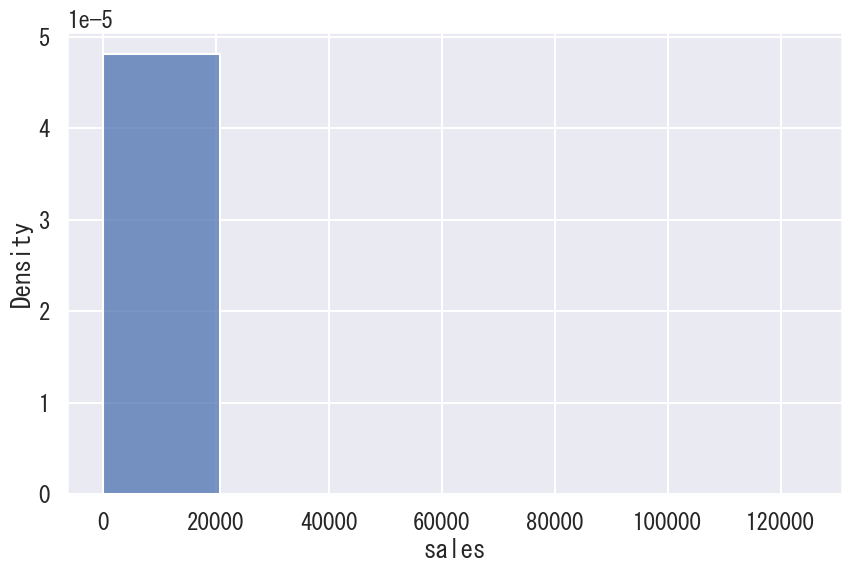

In [32]:
# 予測するtarget
target = train_df["sales"]
# targetの分布と統計量を確認

print(target.describe())
print("="*100)
print(target.quantile(0.95))
print("="*100)
print(target.nlargest(10))

plt.figure(figsize=(10, 6))
sns.histplot(target, bins=6, stat="density")
plt.show()

* salesはかなり左に偏っていて高額の外れ値が多い  
* 95%quantileの値が約2000で高額rank10でも40000以下

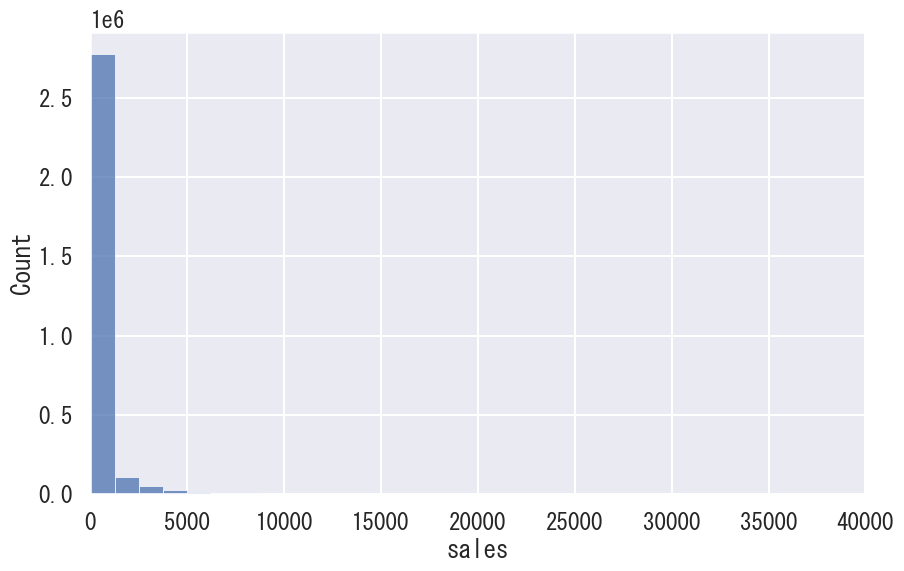

In [37]:
# sales=40000以下で分布を確認
plt.figure(figsize=(10, 6))
sns.histplot(target, bins=100)
plt.xlim([0, 40000])
plt.show()

* sales=40000以下で分布を確認しても分布はかなり左に偏っている

In [39]:
holidays_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [40]:
# train_dfとtest_dfを結合して一度に分析する
all_df = pd.concat([train_df.drop("sales", axis=1), test_df], axis=0).reset_index(drop=True)
all_df

,id,date,store_nbr,family,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0
1,1,2013-01-01,1,BABY CARE,0
2,2,2013-01-01,1,BEAUTY,0
3,3,2013-01-01,1,BEVERAGES,0
4,4,2013-01-01,1,BOOKS,0
...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,1
3029396,3029396,2017-08-31,9,PREPARED FOODS,0
3029397,3029397,2017-08-31,9,PRODUCE,1
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [44]:
# dateをdetetime型に変更
train_df["date"] = pd.to_datetime(train_df["date"])
train_df.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

## dateとsalesの関係についてEDA

In [66]:
train_df_date = train_df.copy()
# dateとsales以外を削除したdataframetrain_df_dateを作る
train_df_date = train_df_date.set_index("date").drop(["id", "store_nbr", "family", "onpromotion"], axis=1)
train_df_date

,sales
date,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


c:\Users\yuuki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


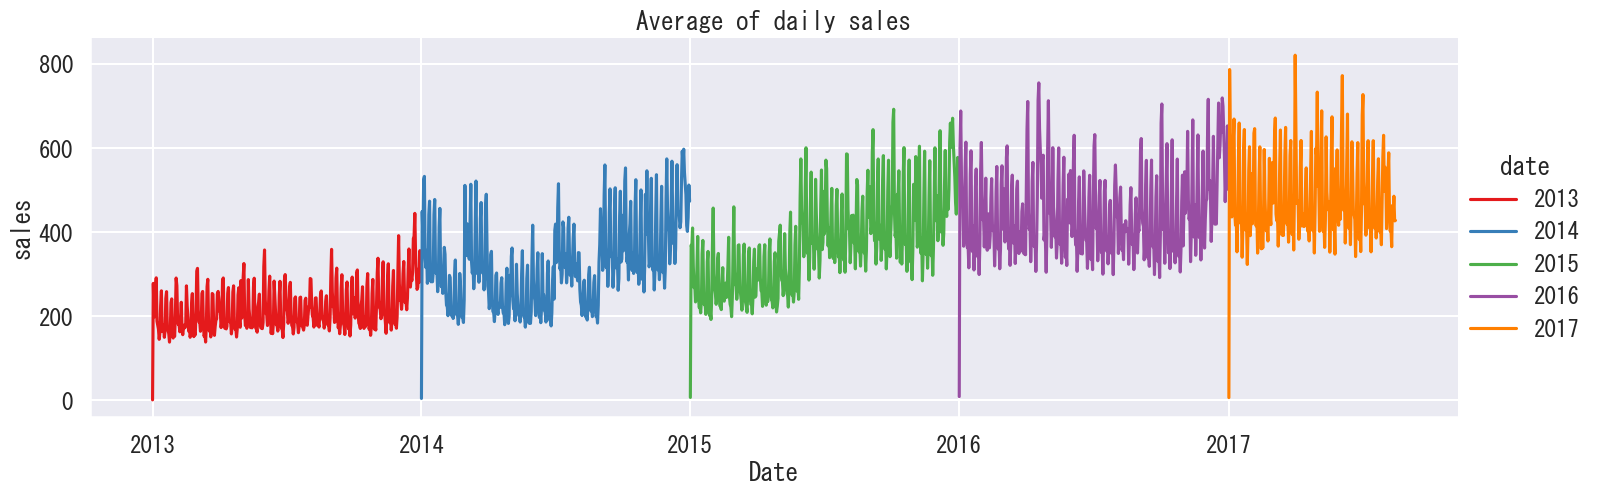

In [80]:
# 日ごとの売り上げの平均の分布
daily_sales_mean = train_df_date.resample("d").mean()

sns.relplot(data=daily_sales_mean, x=daily_sales_mean.index, y="sales", kind="line", hue=daily_sales_mean.index.year, height=5, aspect=3, palette="Set1")
plt.title("Average of daily sales")
plt.xlabel("Date")
plt.show()

c:\Users\yuuki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


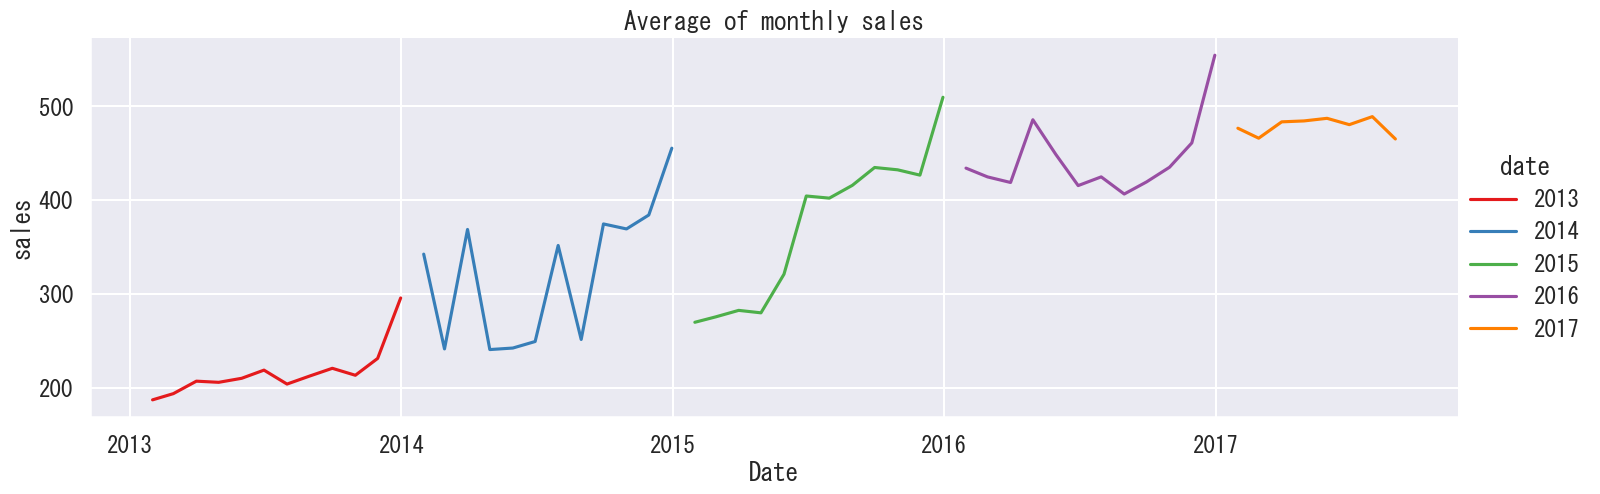

In [81]:
# 月ごとの売り上げの平均の分布
monthly_sales_mean = train_df_date.resample("m").mean()

sns.relplot(data=monthly_sales_mean, x=monthly_sales_mean.index, y="sales", kind="line", hue=monthly_sales_mean.index.year, height=5, aspect=3, palette="Set1")
plt.title("Average of monthly sales")
plt.xlabel("Date")
plt.show()

c:\Users\yuuki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


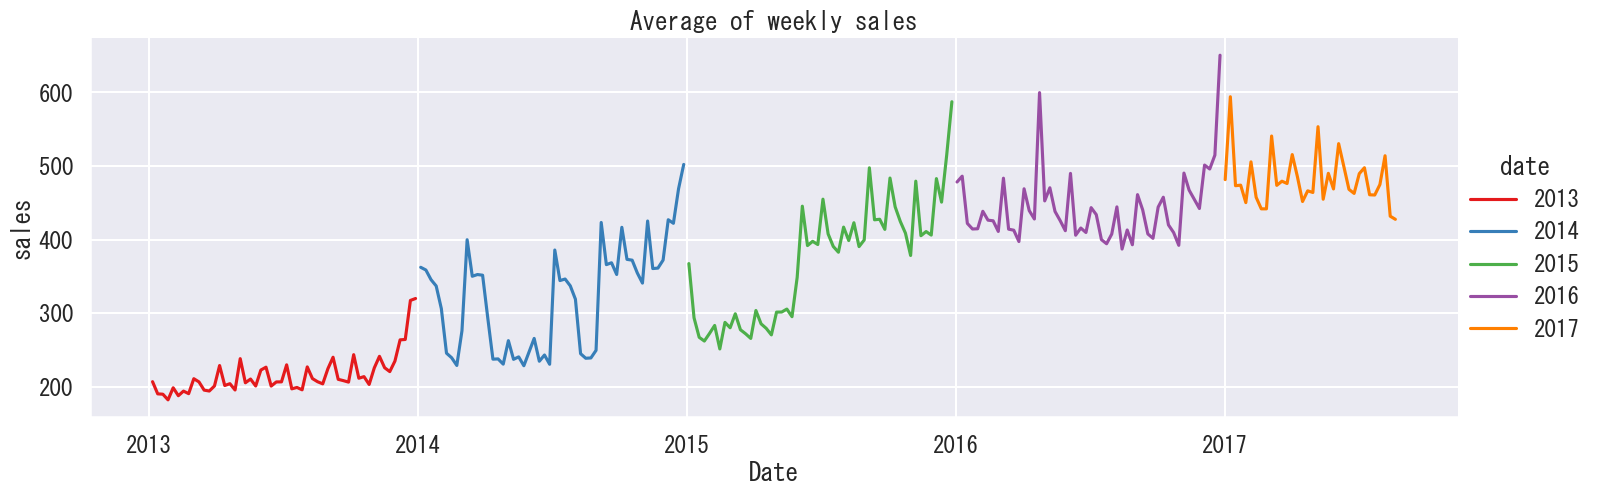

In [82]:
# 週ごとの売り上げの平均の分布
weekly_sales_mean = train_df_date.resample("w").mean()

sns.relplot(data=weekly_sales_mean, x=weekly_sales_mean.index, y="sales", kind="line", hue=weekly_sales_mean.index.year, height=5, aspect=3, palette="Set1")
plt.title("Average of weekly sales")
plt.xlabel("Date")
plt.show()

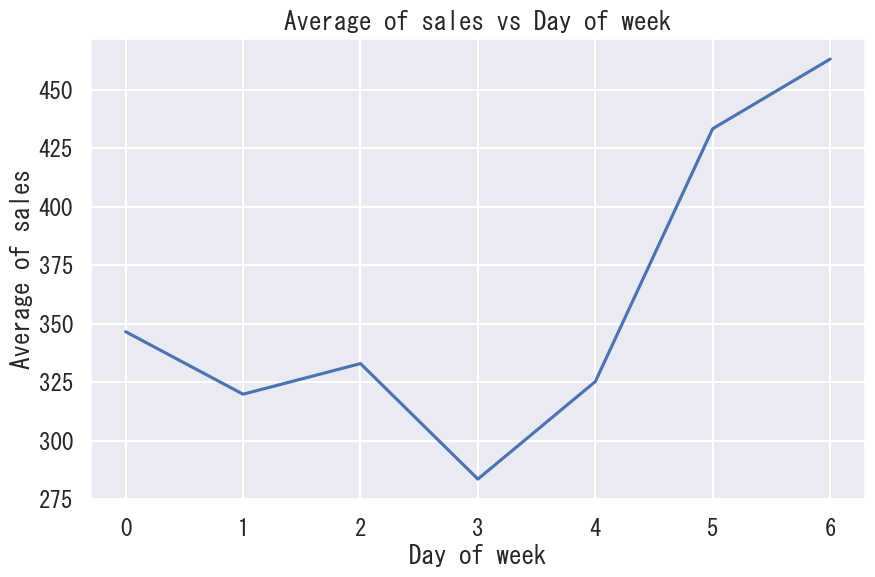

In [169]:
# 曜日ごとの傾向
train_df_dayofweek = train_df_date.groupby(train_df_date.index.dayofweek)["sales"].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df_dayofweek)
plt.xlabel("Day of week")
plt.ylabel("Average of sales")
plt.title("Average of sales vs Day of week")
plt.show()

## dateとsalesの関係についてEDAから分かったこと
* salesは年々右肩上がりで上昇している  
* 年初はsalesが0まで落ちる。おそらく営業していない  
* 土日(dayofweek=5, 6)はsalesが上昇する  
* 木曜日(dayofweek=3)は一週間を通してsalesが最も落ち込む

## onpromotionとsalesの関係についてEDA

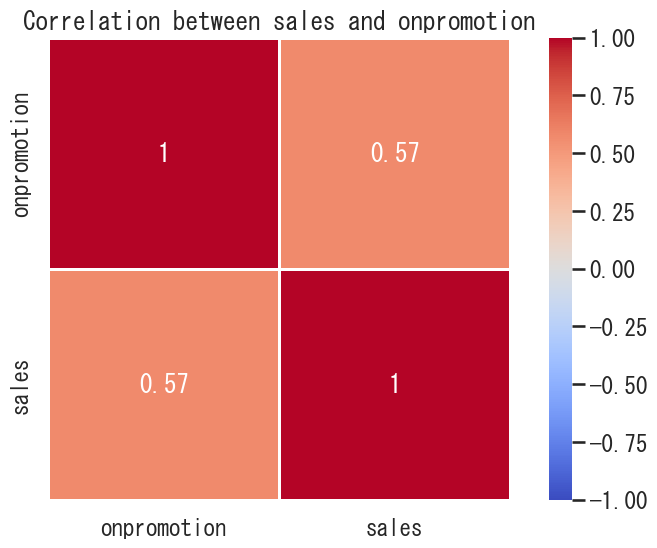

In [171]:
# dateごとのonpromotionとsalesは商品ごとに分かれているので全ての商品のonpromotionとsalesの合計を求める
train_df_onpromotion = train_df.groupby("date")[["onpromotion", "sales"]].sum()

# 相関があるかどうか調べる
plt.figure(figsize=(10, 6))
sns.heatmap(train_df_onpromotion.corr(numeric_only=True), annot=True, cmap="coolwarm", square=True, linewidths=1, vmin=-1)
plt.title("Correlation between sales and onpromotion")
plt.show()

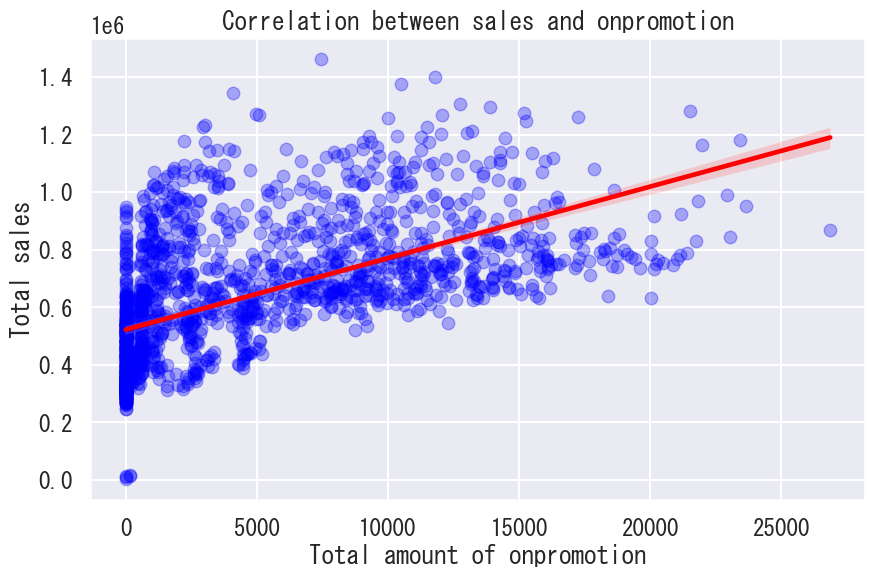

In [172]:
# onpromotionとsalesの関係
plt.figure(figsize=(10, 6))
sns.regplot(data=train_df_onpromotion, x='onpromotion', y='sales', scatter_kws={"color":"blue", "alpha":0.3}, line_kws={"color":"red"})
plt.xlabel("Total amount of onpromotion")
plt.ylabel("Total sales")
plt.title("Correlation between sales and onpromotion")
plt.show()

## onpromotionとsalesの関係についてEDAから分かったこと
* onpromotionの数が増えれば、salesの合計が大きくなる  
* regplotからもheatmapからも正の相関があることがわかる


## familyとsalesの関係についてEDA

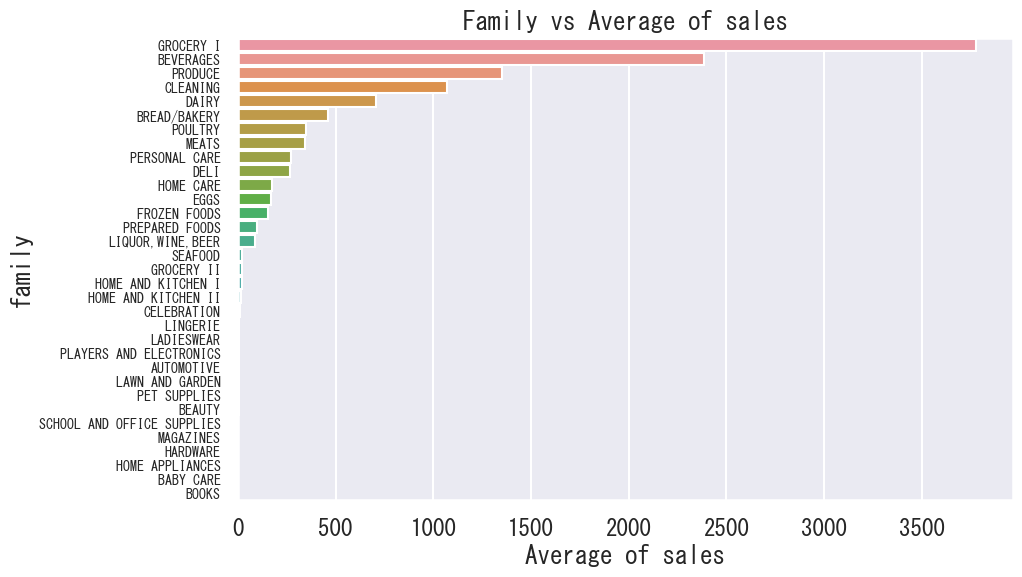

In [173]:
# familyごとのsalesの平均をまとめたdataframeをtrain_df_familyとする
train_df_family = pd.DataFrame(train_df.groupby("family")["sales"].mean().sort_values(ascending=False))

# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df_family, y=train_df_family.index, x="sales", orient="h")
plt.yticks(fontsize=10)
plt.xlabel("Average of sales")
plt.title("Family vs Average of sales")
plt.show()

## familyとsalesの関係についてEDAから分かったこと
* 'GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY'がほとんどのsalesを占めている  
* 'MAGAZINES', 'HARDWARE', 'HOME APPLIANCES', 'BABY CARE', 'BOOKS'はsalesが出ていない

##

## store_nbrとsalesの関係をEDA

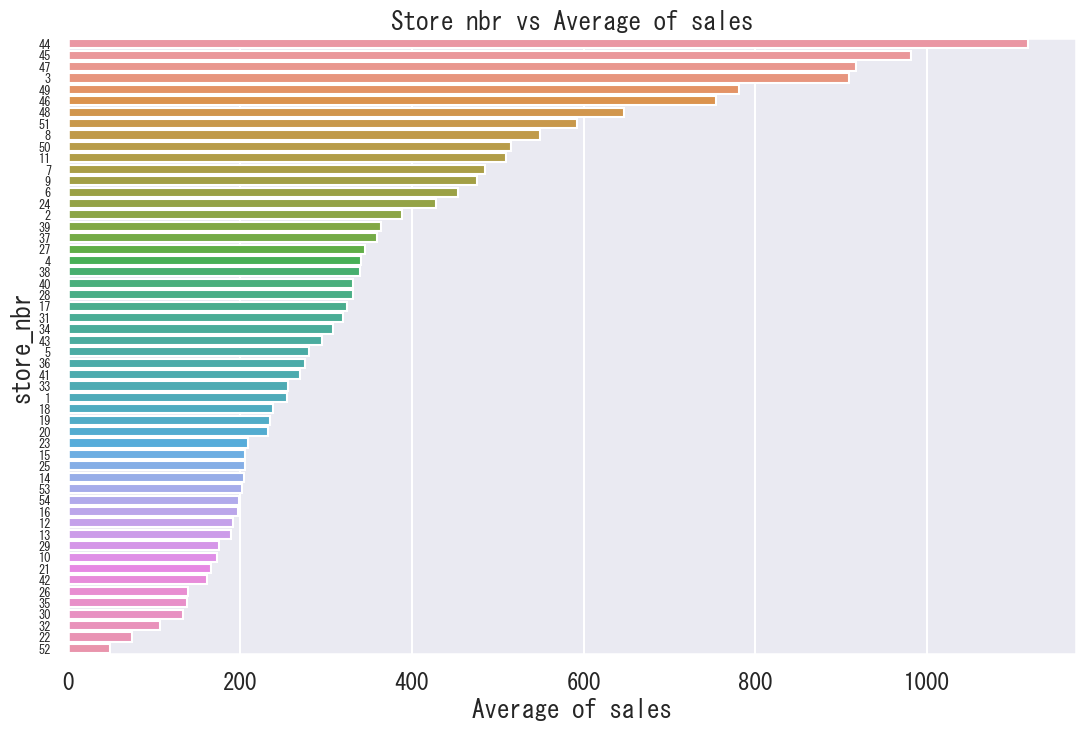

In [180]:
# store_nbrごとのsalesの合計
train_df_store = pd.DataFrame(train_df.groupby("store_nbr")["sales"].mean().sort_values(ascending=False))

# 可視化
plt.figure(figsize=(13, 8))
sns.barplot(data=train_df_store, y=train_df_store.index, x="sales", orient="h", order=train_df_store.index)
plt.yticks(fontsize=9)
plt.xlabel("Average of sales")
plt.title("Store nbr vs Average of sales")
plt.show()

## store_nbrとsalesの関係をEDAから分かったこと
* 44, 45, 47,  3, 49が高いsalesを出している  
* 35, 30, 32, 22, 52はsalesが低い

## TrendのEDA

In [187]:
# dateごとの平均のsalesをdate_sales_avgとする
date_sales_avg = pd.DataFrame(train_df_date.groupby("date")["sales"].mean())
date_sales_avg

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [195]:
# 365日間の移動平均線の作成
moving_avg_365 = pd.DataFrame(date_sales_avg.rolling(window=365, min_periods=365, center=True).mean())
moving_avg_365

,sales
date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-05,NaN
...,...
2017-08-11,NaN
2017-08-12,NaN
2017-08-13,NaN


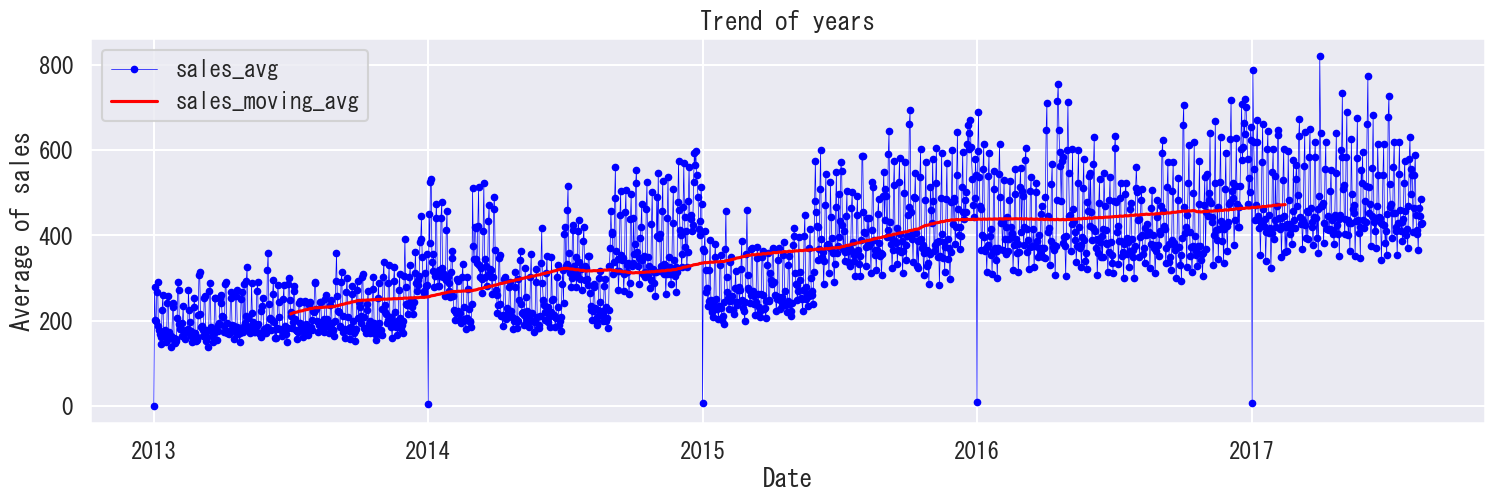

In [207]:
# 可視化
plt.figure(figsize=(18, 5))
plt.plot(date_sales_avg.index, date_sales_avg["sales"], label="sales_avg", color="blue", lw=0.5, marker=".")
plt.plot(moving_avg_365.index, moving_avg_365["sales"], label="sales_moving_avg", color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Average of sales")
plt.title("Trend of years")
plt.show()

## Lag特徴量のEDA

In [233]:
date_sales_avg = pd.DataFrame(train_df_date.groupby("date")["sales"].mean()).reset_index()
date_sales_avg

,date,sales
0,2013-01-01,1.409438
1,2013-01-02,278.390807
2,2013-01-03,202.840197
3,2013-01-04,198.911154
4,2013-01-05,267.873244
...,...,...
1679,2017-08-11,463.733851
1680,2017-08-12,444.798280
1681,2017-08-13,485.768618
1682,2017-08-14,427.004717


In [234]:
# lag特徴量の作成
# 1か月周期
for i in range(30):
    date_sales_avg[f"sales_lag{i+1}"] = date_sales_avg["sales"].shift(i+1)

In [235]:
date_sales_avg

,date,sales,sales_lag1,sales_lag2,sales_lag3,sales_lag4,sales_lag5,sales_lag6,sales_lag7,sales_lag8,...,sales_lag21,sales_lag22,sales_lag23,sales_lag24,sales_lag25,sales_lag26,sales_lag27,sales_lag28,sales_lag29,sales_lag30
0,2013-01-01,1.409438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,278.390807,1.409438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,202.840197,278.390807,1.409438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,198.911154,202.840197,278.390807,1.409438,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,267.873244,198.911154,202.840197,278.390807,1.409438,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2017-08-11,463.733851,365.536988,411.975126,402.786952,447.511203,588.978207,541.915629,464.520587,408.568173,...,439.067508,386.244707,430.964522,409.727109,459.217465,617.734960,543.814324,429.567687,353.339710,420.202018
1680,2017-08-12,444.798280,463.733851,365.536988,411.975126,402.786952,447.511203,588.978207,541.915629,464.520587,...,523.514055,439.067508,386.244707,430.964522,409.727109,459.217465,617.734960,543.814324,429.567687,353.339710
1681,2017-08-13,485.768618,444.798280,463.733851,365.536988,411.975126,402.786952,447.511203,588.978207,541.915629,...,574.797273,523.514055,439.067508,386.244707,430.964522,409.727109,459.217465,617.734960,543.814324,429.567687
1682,2017-08-14,427.004717,485.768618,444.798280,463.733851,365.536988,411.975126,402.786952,447.511203,588.978207,...,458.229140,574.797273,523.514055,439.067508,386.244707,430.964522,409.727109,459.217465,617.734960,543.814324


In [239]:
# salesとsales_lagとの相関を確認
date_sales_avg_corr = date_sales_avg.corr()
date_sales_avg_corr["sales"].sort_values(ascending=False).head(12)

sales          1.000000
sales_lag7     0.826366
sales_lag14    0.821830
sales_lag28    0.777000
sales_lag21    0.774140
sales_lag1     0.766884
date           0.718394
sales_lag6     0.698641
sales_lag15    0.681688
sales_lag13    0.680782
sales_lag8     0.680051
sales_lag20    0.648013
Name: sales, dtype: float64

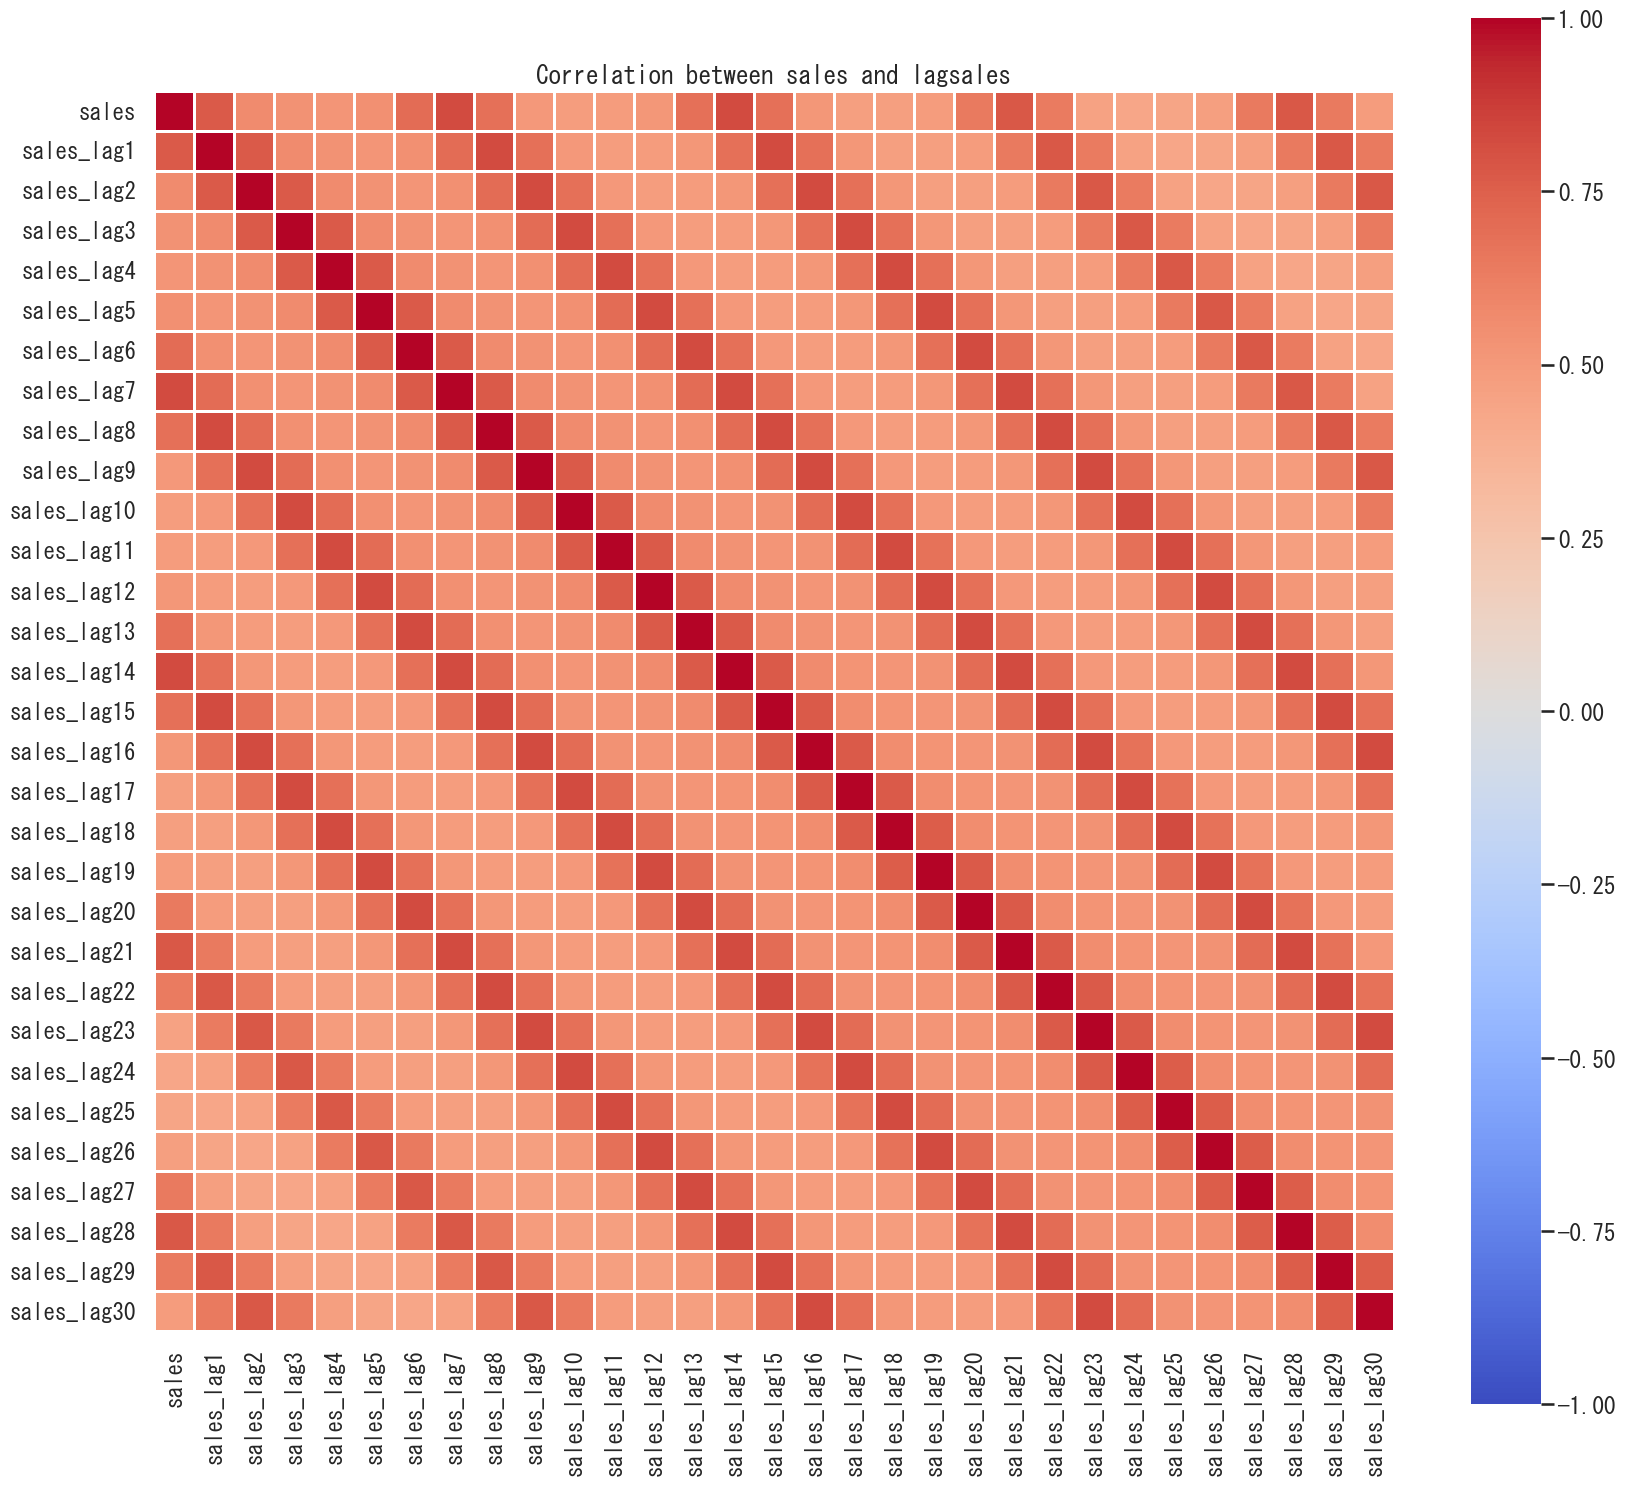

In [243]:
# 相関の周期を確認
plt.figure(figsize=(20, 18))
sns.heatmap(date_sales_avg.corr(numeric_only=True), annot=False, cmap="coolwarm", square=True, linewidths=1, vmin=-1)
plt.title("Correlation between sales and lagsales")
plt.show()

In [245]:
import statsmodels.api as sm

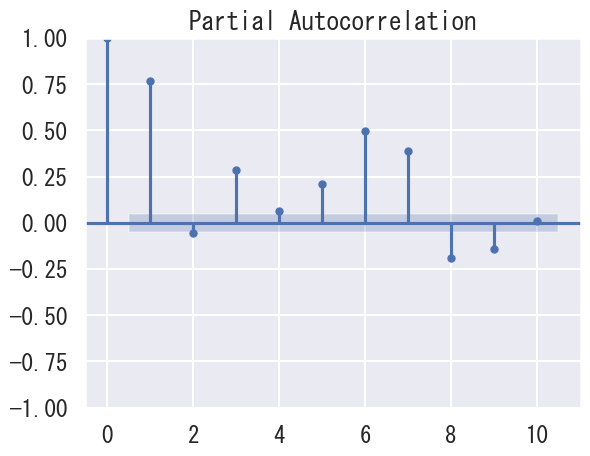

In [247]:
# 偏自己相関
fig = sm.graphics.tsa.plot_pacf(date_sales_avg["sales"], lags=10)

In [248]:
date_sales_avg.columns

Index(['date', 'sales', 'sales_lag1', 'sales_lag2', 'sales_lag3', 'sales_lag4',
       'sales_lag5', 'sales_lag6', 'sales_lag7', 'sales_lag8', 'sales_lag9',
       'sales_lag10', 'sales_lag11', 'sales_lag12', 'sales_lag13',
       'sales_lag14', 'sales_lag15', 'sales_lag16', 'sales_lag17',
       'sales_lag18', 'sales_lag19', 'sales_lag20', 'sales_lag21',
       'sales_lag22', 'sales_lag23', 'sales_lag24', 'sales_lag25',
       'sales_lag26', 'sales_lag27', 'sales_lag28', 'sales_lag29',
       'sales_lag30'],
      dtype='object')

## Lag特徴量のEDAから分かったこと
* lag1からlag7で一つの周期になっている  
* heatmapと偏自己相関のグラフから使えるlag特徴量はsales_lag1, sales_lag3, sales_lag5, sales_lag6, sales_lag7

## holidays_dfについてのEDA

In [280]:
holidays_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [281]:
holidays_df["date"] = pd.to_datetime(holidays_df["date"])

In [250]:
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [252]:
for col in holidays_df.columns:
    print(col)
    print(holidays_df[col].unique())
    print(holidays_df[col].nunique())
    print("="*100)

date
['2012-03-02' '2012-04-01' '2012-04-12' '2012-04-14' '2012-04-21'
 '2012-05-12' '2012-06-23' '2012-06-25' '2012-07-03' '2012-07-23'
 '2012-08-05' '2012-08-10' '2012-08-15' '2012-08-24' '2012-09-28'
 '2012-10-07' '2012-10-09' '2012-10-12' '2012-11-02' '2012-11-03'
 '2012-11-06' '2012-11-07' '2012-11-10' '2012-11-11' '2012-11-12'
 '2012-12-05' '2012-12-06' '2012-12-08' '2012-12-21' '2012-12-22'
 '2012-12-23' '2012-12-24' '2012-12-25' '2012-12-26' '2012-12-31'
 '2013-01-01' '2013-01-05' '2013-01-12' '2013-02-11' '2013-02-12'
 '2013-03-02' '2013-04-01' '2013-04-12' '2013-04-14' '2013-04-21'
 '2013-04-29' '2013-05-01' '2013-05-11' '2013-05-12' '2013-05-24'
 '2013-06-23' '2013-06-25' '2013-07-03' '2013-07-23' '2013-07-24'
 '2013-07-25' '2013-08-05' '2013-08-10' '2013-08-15' '2013-08-24'
 '2013-09-28' '2013-10-07' '2013-10-09' '2013-10-11' '2013-11-02'
 '2013-11-03' '2013-11-06' '2013-11-07' '2013-11-10' '2013-11-11'
 '2013-11-12' '2013-12-05' '2013-12-06' '2013-12-08' '2013-12-21'
 '201

In [282]:
# メタデータからtransferred=Falseでtype!='Work Day'でlocale != Localのものに注目
holidays_df_1 = holidays_df[(holidays_df["transferred"] == False) & (holidays_df["type"] != "Work Day") & (holidays_df["locale"] != "Local")]
holidays_df_1

,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [258]:
date_sales_avg = pd.DataFrame(train_df_date.groupby("date")["sales"].mean()).reset_index()
date_sales_avg

,date,sales
0,2013-01-01,1.409438
1,2013-01-02,278.390807
2,2013-01-03,202.840197
3,2013-01-04,198.911154
4,2013-01-05,267.873244
...,...,...
1679,2017-08-11,463.733851
1680,2017-08-12,444.798280
1681,2017-08-13,485.768618
1682,2017-08-14,427.004717


In [283]:
National_hodidays_df = date_sales_avg.merge(holidays_df_1, on="date", how="left")
National_hodidays_df

,date,sales,type,locale,locale_name,description,transferred
0,2013-01-01,1.409438,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,278.390807,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,202.840197,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,198.911154,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,267.873244,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1684,2017-08-11,463.733851,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
1685,2017-08-12,444.798280,NaN,NaN,NaN,NaN,NaN
1686,2017-08-13,485.768618,NaN,NaN,NaN,NaN,NaN
1687,2017-08-14,427.004717,NaN,NaN,NaN,NaN,NaN


In [284]:
National_hodidays_df.dropna(inplace=True)
National_hodidays_df = National_hodidays_df.set_index("date")
National_hodidays_df

,sales,type,locale,locale_name,description,transferred
date,,,,,,
2013-01-01,1.409438,Holiday,National,Ecuador,Primer dia del ano,False
2013-02-11,156.356672,Holiday,National,Ecuador,Carnaval,False
2013-02-12,173.288884,Holiday,National,Ecuador,Carnaval,False
2013-04-01,240.637737,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2013-04-29,184.509469,Holiday,National,Ecuador,Viernes Santo,False
...,...,...,...,...,...,...
2017-05-13,626.810826,Additional,National,Ecuador,Dia de la Madre-1,False
2017-05-14,496.184014,Event,National,Ecuador,Dia de la Madre,False
2017-05-26,552.475394,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False


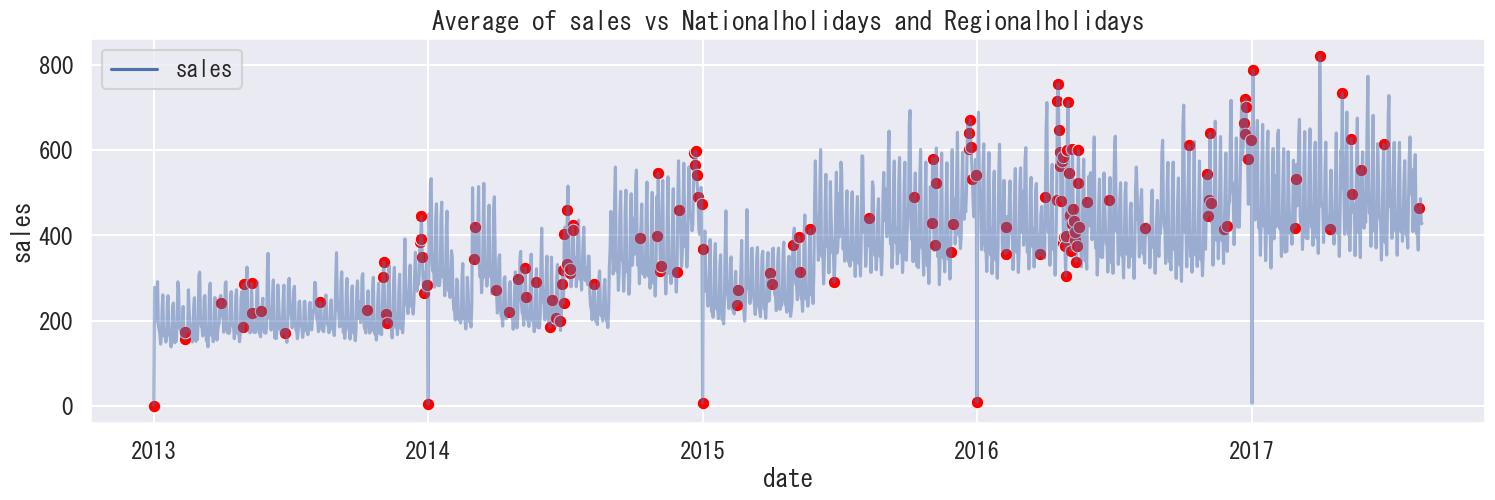

In [293]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=date_sales_avg, alpha=0.5)
sns.scatterplot(data=National_hodidays_df, x=National_hodidays_df.index, y="sales", color="red")
plt.title("Average of sales vs Nationalholidays and Regionalholidays")
plt.show()

In [289]:
holidays_df_2 = holidays_df[(holidays_df["transferred"] == False) & (holidays_df["type"] != "Work Day") & (holidays_df["locale"] == "Local")]
holidays_df_2

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
...,...,...,...,...,...,...
338,2017-11-12,Holiday,Local,Ambato,Independencia de Ambato,False
339,2017-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False


In [290]:
Local_hodidays_df = date_sales_avg.merge(holidays_df_2, on="date", how="left")
Local_hodidays_df.dropna(inplace=True)
Local_hodidays_df = Local_hodidays_df.set_index("date")
Local_hodidays_df

,sales,type,locale,locale_name,description,transferred
date,,,,,,
2013-03-02,307.439509,Holiday,Local,Manta,Fundacion de Manta,False
2013-04-12,176.428152,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2013-04-14,268.472025,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2013-04-21,272.570725,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
2013-05-12,217.654604,Holiday,Local,Puyo,Cantonizacion del Puyo,False
...,...,...,...,...,...,...
2017-07-23,574.797273,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False
2017-07-24,458.229140,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
2017-07-25,400.438627,Additional,Local,Guayaquil,Fundacion de Guayaquil,False


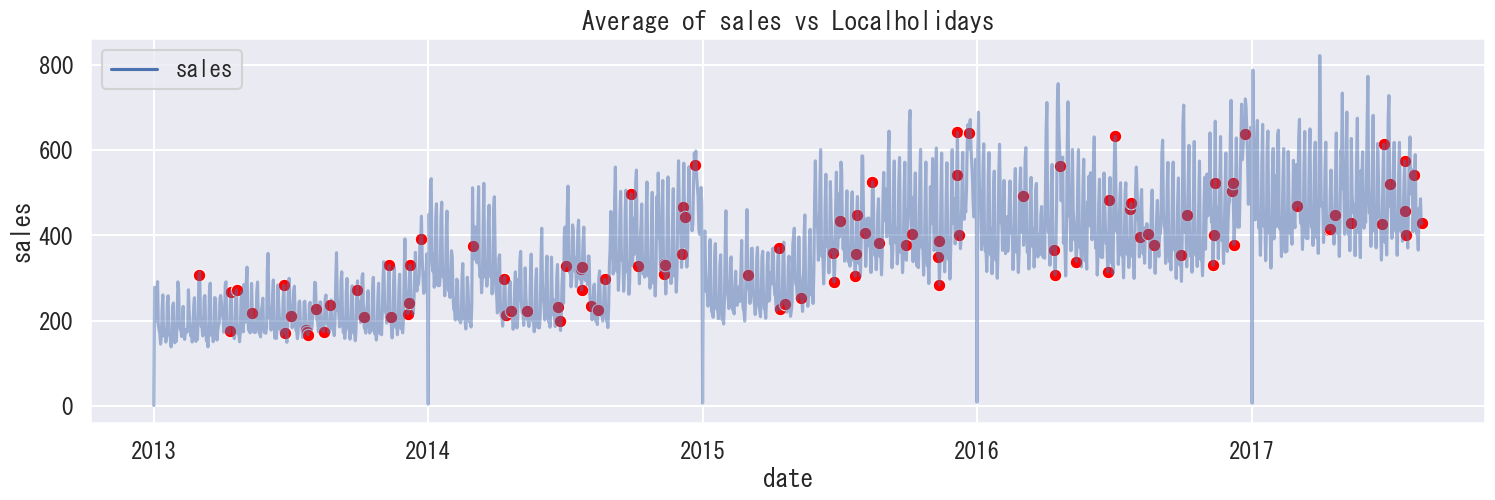

In [294]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=date_sales_avg, alpha=0.5)
sns.scatterplot(data=Local_hodidays_df, x=Local_hodidays_df.index, y="sales", color="red")
plt.title("Average of sales vs Localholidays")
plt.show()

### type = 'Work Day'以外のholidaysについて
* Localよりも'Regional' 'National'のholidaysはsalesが大きくなる

In [332]:
# train_df_date

In [333]:
# holidays_df = holidays_df[holidays_df["locale"] != "Local"]


In [334]:
# holidays_df_NR = holidays_df[["date", "type"]]

In [335]:
# holidays_df_NR["type"].unique()

In [336]:
# # typeのworkday以外を1、workdayを0とする
# type_dict = {'Holiday':1, 'Transfer':1, 'Additional':1, 'Bridge':1, 'Work Day':0, 'Event':1}
# holidays_df_NR["is_holidays"] = holidays_df_NR["type"]
# holidays_df_NR["is_holidays"] = holidays_df_NR["is_holidays"].map(type_dict)
# holidays_df_NR["is_holidays"].unique()

In [337]:
# # nationalとregionalのholidayでweekdayとそれ以外がどれだけsalesが違うか確認する
# NR_hodidays_df = train_df_date.merge(holidays_df_NR, on="date", how="left")
# NR_hodidays_df.dropna(inplace=True)
# NR_hodidays_df

In [338]:
# NR_hodidays_w = NR_hodidays_df[NR_hodidays_df["is_holidays"] == 0.0]
# NR_hodidays_w

In [339]:
# NR_hodidays_w["date"].unique()

In [340]:
# NR_hodidays_ww = NR_hodidays_df[NR_hodidays_df["is_holidays"] == 1.0]
# NR_hodidays_ww

In [341]:
# plt.figure(figsize=(18, 5))
# plt.scatter(x=NR_hodidays_ww.index, y=NR_hodidays_ww["sales"], color="red")
# plt.scatter(x=NR_hodidays_w.index, y=NR_hodidays_w["sales"], color="blue")
# plt.ylim([0, 20000])
# plt.show()